# Chapter 1 

## Exercise 2

In [2]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
# Define iris data loading function
def load_iris(iris_data_file):
    iris_data = pd.read_csv(
        iris_data_file,
        names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
    )
    iris_data['Species'] = iris_data['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
    iris_data = iris_data.rename(columns={'Species':'Target'})
    return iris_data

# Define function for dataset row shuffling
def shuffle_rows(data, random_state=None):
    shuffled_data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    return shuffled_data

# Define function for dataset splitting 
def split_dataset(data, train_fraction=0.8,random_state=None):
    train_split, test_split = train_test_split(data, train_size=train_fraction, random_state=random_state)
    print('Train split proportions:')
    print(train_split.groupby('Target').size())
    print('Test split proportions:')
    print(test_split.groupby('Target').size())
    return (train_split, test_split)

# Define function for decision tree classification
def decision_tree_classifier(train_split, random_state=None):
    tree = DecisionTreeClassifier(random_state=random_state)
    train_data = train_split.drop('Target', axis=1)
    train_target = train_split['Target']
    fitted_tree = tree.fit(train_data, train_target)
    print(export_text(fitted_tree, feature_names=list(train_data.columns)))
    return(fitted_tree)

# Define function for model evaluation
def prediction_evaluation(test_split, model):
    test_data = test_split.drop('Target', axis=1)
    test_target = test_split['Target']
    result_data = test_split.copy()
    result_data['PredictedValue'] = model.predict(test_data)
    result_data['Prediction'] = result_data.apply(lambda x: x['Target'].capitalize() if x['Target'] == x['PredictedValue'] else 'Classification failure', axis=1)
    print('Confusion matrix:\n', confusion_matrix(result_data['PredictedValue'], result_data['Target']))
    print('Accuracy: ', accuracy_score(result_data['PredictedValue'], result_data['Target']))
    return result_data

# Define function for prediction plotting
def plot_predictions(fitted_data, x, y):
    petal_plot, petal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
    sb.scatterplot(x=x, y=y, data=fitted_data, hue=fitted_data['Prediction'])

Train split proportions:
Target
setosa        40
versicolor    39
virginica     41
dtype: int64
Test split proportions:
Target
setosa        10
versicolor    11
virginica      9
dtype: int64
|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.70
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- Sepal.Length <= 6.60
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- Sepal.Length >  6.60
|   |   |   |   |   |--- class: virginica
|   |--- Petal.Width >  1.70
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica

Confusion matrix:
 [[10  0  0]
 [ 0 10

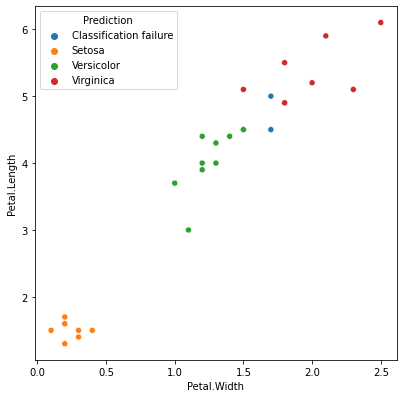

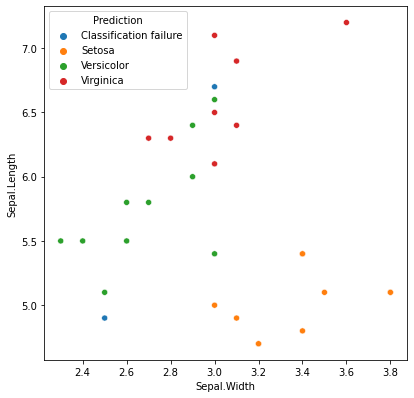

In [15]:
random_state = RandomState(seed=42)
iris_data = load_iris('../data/iris.data')
iris_data = shuffle_rows(iris_data, random_state)
iris_train, iris_test = split_dataset(iris_data, train_fraction=0.8, random_state=random_state)
iris_fitted_tree = decision_tree_classifier(iris_train, random_state=random_state)
iris_predicted = prediction_evaluation(iris_test, iris_fitted_tree)
plot_predictions(iris_predicted, 'Petal.Width', 'Petal.Length')
plot_predictions(iris_predicted, 'Sepal.Width', 'Sepal.Length')

In [16]:
# Define wdbc data loading function
def load_wdbc(wdbc_data_file):
    wdbc_data = pd.read_csv(
        wdbc_data_file,
        header=None,
        prefix='X',
        usecols=range(1,32)
    )
    #wdbc_data.drop('X0', inplace=True)
    wdbc_data['X1'] = wdbc_data['X1'].astype('category')
    wdbc_data = wdbc_data.rename(columns={'X1':'Target'})
    return wdbc_data

In [17]:
wdbc_data = load_wdbc('../data/wdbc.data')
wdbc_data.head()

,Target,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Train split proportions:
Target
B    286
M    169
dtype: int64
Test split proportions:
Target
B    71
M    43
dtype: int64
|--- X22 <= 16.80
|   |--- X29 <= 0.14
|   |   |--- X15 <= 91.56
|   |   |   |--- X15 <= 38.60
|   |   |   |   |--- X16 <= 0.00
|   |   |   |   |   |--- X28 <= 0.19
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- X28 >  0.19
|   |   |   |   |   |   |--- class: M
|   |   |   |   |--- X16 >  0.00
|   |   |   |   |   |--- X23 <= 33.27
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- X23 >  33.27
|   |   |   |   |   |   |--- X23 <= 33.56
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- X23 >  33.56
|   |   |   |   |   |   |   |--- class: B
|   |   |   |--- X15 >  38.60
|   |   |   |   |--- X15 <= 39.40
|   |   |   |   |   |--- class: M
|   |   |   |   |--- X15 >  39.40
|   |   |   |   |   |--- X30 <= 0.21
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- X30 >  0.21
|   |   |   |   |   |   |--- class: B
| 

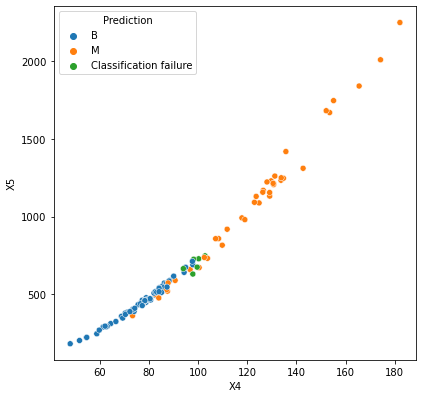

In [18]:
random_state = RandomState(seed=42)
wdbc_data = load_wdbc('../data/wdbc.data')
wdbc_data = shuffle_rows(wdbc_data, random_state)
wdbc_train, wdbc_test = split_dataset(wdbc_data, train_fraction=0.8, random_state=random_state)
wdbc_fitted_tree = decision_tree_classifier(wdbc_train, random_state=random_state)
wdbc_predicted = prediction_evaluation(wdbc_test, wdbc_fitted_tree)
plot_predictions(wdbc_predicted, 'X4', 'X5')

# Problem 3

Let's try using a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) for our task instead of a decision tree classifier.

Tasks are:

- Create a new function `random_forest_classifier` that:
    - takes a training dataset and `random_state` as its input
    - creates a `RandomForestClassifier` with a `random_state` taken from the argument
    - trains the random forest with the training dataset
    - returns the fitted forest

Use the `decision_tree_classifier`-function as a template.

Do note that it is not as easy to print the rules that the random forest uses for its decision making: random forest uses multiple (by default 100) decision trees so one would need to print all of them. Thus you do not need to include the `print`-statement.

In [34]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classifier(train_split, random_state=None):
    forest = RandomForestClassifier(random_state=random_state)
    train_data = train_split.drop('Target', axis=1)
    train_target = train_split['Target']
    fitted_forest = forest.fit(train_data, train_target)
    return(fitted_forest)

Confusion matrix:
 [[70  1]
 [ 1 42]]
Accuracy:  0.9824561403508771


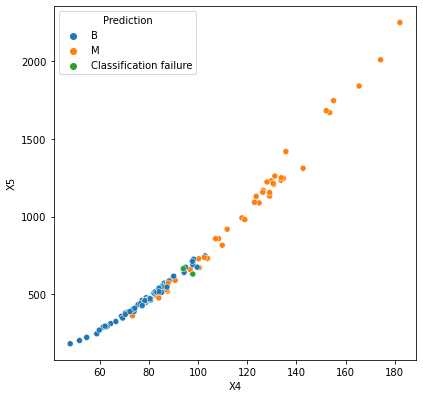

In [35]:
wdbc_fitted_forest = random_forest_classifier(wdbc_train, random_state=random_state)
wdbc_predicted_forest = prediction_evaluation(wdbc_test, wdbc_fitted_forest)
plot_predictions(wdbc_predicted_forest, 'X4', 'X5')

## Problem 4

Let's try to improve our old iris-pipeline with our newly created `random_forest_classifier`.

Tasks:
- Create a new iris pipeline that uses our `random_forest_classifier` without creating any new functions.
- Compare the accuracy. DId it improve? If it did/did not, can you think why that was the case?

Confusion matrix:
 [[10  0  0]
 [ 0 10  1]
 [ 0  1  8]]
Accuracy:  0.9333333333333333


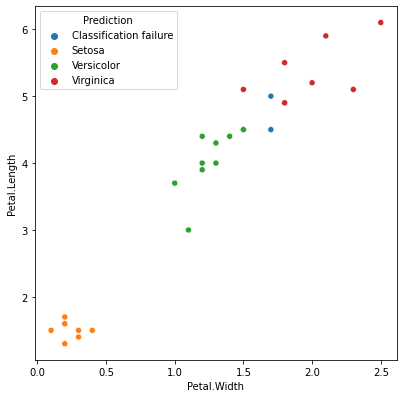

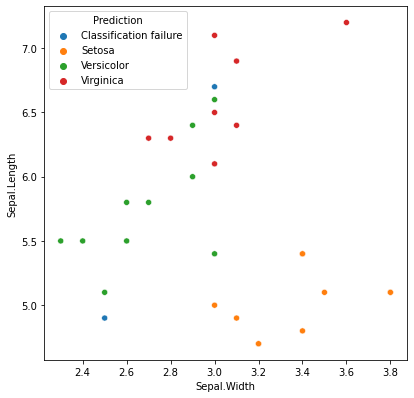

In [29]:
iris_fitted_forest = random_forest_classifier(iris_train, random_state=random_state)
iris_predicted_forest = prediction_evaluation(iris_test, iris_fitted_forest)
plot_predictions(iris_predicted_forest, 'Petal.Width', 'Petal.Length')
plot_predictions(iris_predicted_forest, 'Sepal.Width', 'Sepal.Length')